In [23]:
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

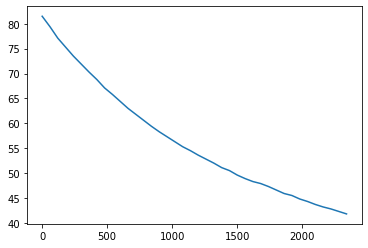

In [24]:
arquivo = pd.read_excel("Proj2 - Experimento_dados.xlsx")
arquivo.head()
tagua_lista = list(arquivo['Tágua (oC)'])
tagua_lista.pop(0)

Trec_lista = list(arquivo['Txic (oC)'])
lista_t_exp = np.arange(0,2400,60)
plt.plot(lista_t_exp,tagua_lista)

In [49]:
#Dimensões do recipiente
hi=9*1e-2
he= 9.5 *1e-2
dia=8*1e-2
diae=9*1e-2
As = pi*(dia/2)**2 # Area superficie (m2)
Ape=(2*pi*(diae/2))*he # Area de contato externa (m2)
Api = (2*pi*(dia/2))*hi # Area de contato do recipiente CERÂMICA (m2)
Vr = As*hi # (m3)

hs = 38 # Coeficiente de convecção do ar
Ta = 24+273.15 # Temperatura ambiente 
dr = 0.25 * 1e-2 # Metade da espessura do recipiente (m)
Kr = 0.92 #Coeficiente de condução do recipiente CERÂMICA

da = 997 #densidade da agua (kg/m3) 

ma = da*Vr  # Massa da água (kg)
ca = 4186 # calor específico da água (J/(kg.K)
mr = 0.200 # Massa do recipiente
cr = 850 # Calor específico do recipiente 
# emissividade da cerâmica = 0.9

# Constante de resistência do Material 
Rr = dr/(Kr*Api)
Rp = 1/(hs*Ape)

[[357.75       357.75      ]
 [356.35583842 351.18514082]
 [354.62304803 349.44848672]
 [352.92984517 347.90304237]
 [351.28618869 346.40736815]
 [349.69095752 344.9558946 ]
 [348.14273112 343.54719832]
 [346.64012803 342.18001369]
 [345.18180041 340.85311144]
 [343.76644804 339.56531166]
 [342.39279962 338.31545804]
 [341.05962957 337.10243563]
 [339.76574355 335.92515834]
 [338.50998389 334.78256725]
 [337.29122946 333.67364918]
 [336.1083867  332.59740857]
 [334.96040111 331.55287856]
 [333.84624355 330.53912929]
 [332.7649171  329.55525366]
 [331.71545282 328.60036871]
 [330.69690998 327.67361748]
 [329.70837938 326.77417437]
 [328.74897895 325.90123745]
 [327.81785042 325.05402437]
 [326.91415999 324.23177507]
 [326.03709857 323.43375431]
 [325.18588124 322.65924991]
 [324.35974649 321.90756834]
 [323.55795541 321.17803632]
 [322.77979093 320.47000042]
 [322.02455664 319.78282806]
 [321.29157657 319.11590502]
 [320.58019509 318.46863453]
 [319.88977607 317.84043666]
 [319.21970129

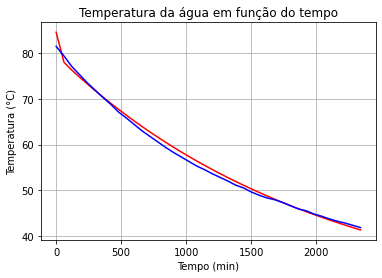

In [52]:
def modelo(x, t):
    Tagua = x[0]
    Tr = x[1]

    Q1 = (Tagua-Tr)/Rr
    Q2 = (Tr - Ta)/(Rr + Rp) 
    Q3 = (Tagua-Ta)/(1/(hs*As))

    dTaguadt = (1/(ma*ca))*(-Q1-Q3)
    dTrdt = (1/(mr*cr))*(Q1-Q2)
    dxdt = [dTaguadt, dTrdt]
    return dxdt 

dt = 60 
lista_t = np.arange(0, 60*40, dt)

Tr_0 = 84.6 +273.15
Tagua_0 = 84.6 +273.15
x_0 = [Tr_0, Tagua_0]

x = odeint(modelo, x_0, lista_t)
Tr_lista = x[:,0]
Tagua_lista = x[:, 1]
print(x)
# Gráficos 
plt.plot(lista_t, Tagua_lista-273.15,color='red')
plt.plot(lista_t_exp,tagua_lista,color='blue')
plt.title('Temperatura da água em função do tempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (min)')
plt.grid(True)
plt.show()  

In [27]:
# VARIÁVEIS DE RECIPIENTES
# Cerâmica[0](Alumina), Vidro[1](Borossilicato), Plástico-Polypropylene[2]

# 12-38.5, 1.15 , 0.11-0.44
Kr = [0.92, 1.15 , 0.44] #Coeficiente de condução do recipiente (W/(m.K))
# 430-560, 7-19.84 ,24.5
hp = [560, 19.84 , 24.5] # Coeficiente de convecção do recipiente |(W/(m2.K))
# 451-955, 0.83, 1.6-2.5 
cr = [955, 0.83, 2.5] # Calor específico do recipiente  (J/(kg.K)

V = # Volume xícara (m3) - IGUAL PARA TODOS

densidades = [3.8e3,2.23e4,1.07e3] # Densidade (kg/m3)
def massa_recipientes(densidades, V):
    mr = []# Massa do recipiente (kg)
    for d in densidades:
        m = d*V
        mr.append(m)

    return mr # Massa (Kg)


SyntaxError: invalid syntax (Temp/ipykernel_17108/201350640.py, line 11)

In [ ]:
# COUNTERPLOT
# Temperatura do Líquido X Tempo
